## Análise de Dados do Airbnb do Rio de Janeiro


**Objetivo**:

- Este projeto tem como objetivo realizar a limpeza, transformação e análise de dados de anúncios do Airbnb no Rio de Janeiro. A ideia é aplicar técnicas de manipulação de dados para entender melhor o mercado de hospedagem, identificar padrões e tendências e preparar os dados para futuras análises ou modelagem preditiva.

### Descrição dos Dados

Este conjunto de dados é composto por duas tabelas principais:

**1. Listings (Anúncios de Propriedades)**
* **id**: Identificador único do imóvel.
* **neighbourhood_cleansed**: Bairro onde o imóvel está localizado.
* **room_type**: Tipo de acomodação (ex: quarto privativo, inteiro, etc.).
* **accommodates**: Número máximo de pessoas que a propriedade acomoda.
* **bathrooms**: Quantidade de banheiros disponíveis.
* **bedrooms**: Número de quartos na propriedade.
* **beds**: Número total de camas disponíveis.
* **price**: Preço da diária em moeda local.

**2. Reviews (Avaliações de Hóspedes)**
* **id**: Identificador único do imóvel (correspondente ao dataset de listings).
* **number_of_reviews**: Quantidade total de avaliações recebidas.
* **review_scores_rating**: Pontuação média das avaliações dadas pelos hóspedes.

### Setup

In [1]:
#Data Wraling 
import pandas as pd
import numpy as np 

#Data visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Warnings
import warnings 

In [2]:
#Remove warnings
warnings.filterwarnings('ignore')

#Padronizando visualizações
sns.set_theme(
    style = 'whitegrid',
    font_scale = 1.1,
    rc= {'figure.figsize': (8, 6),       # Tamanho padrão das figuras
        'axes.titlesize': 16,            # Tamanho do título do gráfico
        'axes.titleweight': 'bold',      # Título do gráfico em negrito
        'axes.labelsize': 12,            # Tamanho dos rótulos dos eixos
        'axes.labelweight': 'bold',      # Rótulos dos eixos em negrito
        'xtick.labelsize': 10,           # Tamanho dos rótulos do eixo X (os números/categorias)
        'ytick.labelsize': 10,           # Tamanho dos rótulos do eixo Y (os números)
        'legend.fontsize': 10,           # Tamanho da fonte da legenda
        'lines.linewidth': 2,            # Largura padrão das linhas
        'axes.formatter.useoffset': False, # Evita notação científica para pequenos números
        'axes.formatter.limits': (-4, 4)   # Controla quando usar notação científica
        }
    )
    

### Data Understanding

In [3]:
#Import datas
df_listing = pd.read_csv('../Data/Raw/listings_cleaned.csv')
df_reviews = pd.read_csv('../Data/Raw/reviews.csv')

In [4]:
#Primieras linhas e dimensão Df listiginds
df_listing.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0


In [5]:
#Df reviews
df_reviews.head()

,id,number_of_reviews,review_scores_rating
0,272335,367,4.92
1,272631,32,5.00
2,273363,5,5.00
3,273463,654,4.83
4,273496,60,4.80


In [6]:
#Dimensãoes 
print('Dimensão Dataframe Listing', df_listing.shape)
print('Dimensão Dataframe Reviews', df_reviews.shape)

Dimensão Dataframe Listing (39499, 8)
Dimensão Dataframe Reviews (32695, 3)


Mesclando datasets (merge)

In [7]:
#Mesclando os dois dataframes
df = pd.merge(df_listing,df_reviews)

In [8]:
#Primeiras linhas
df.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367,4.920000
1,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.000000
2,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0,0,4.812309
3,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5,5.000000
4,273463,Lagoa,Entire home/apt,6,2.0,2.0,6.0,1411.0,654,4.830000


In [9]:
#Infos gerais 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      32695 non-null  int64  
 1   neighbourhood_cleansed  32695 non-null  object 
 2   room_type               32695 non-null  object 
 3   accommodates            32695 non-null  int64  
 4   bathrooms               32695 non-null  float64
 5   bedrooms                32695 non-null  float64
 6   beds                    32695 non-null  float64
 7   price                   32695 non-null  float64
 8   number_of_reviews       32695 non-null  int64  
 9   review_scores_rating    32695 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 2.5+ MB


In [10]:
#Dimensão do DataFrame 
df.shape

(32695, 10)

In [11]:
#Lista das coluans a serem convertidas
convert_cols = ['bathrooms', 'bedrooms', 'beds']

#Convertendo 
df[convert_cols] = df[convert_cols].astype(int)

In [12]:
df['room_type'].value_counts()

room_type
Entire home/apt    26024
Private room        6428
Shared room          227
Hotel room            16
Name: count, dtype: int64

In [13]:
#Transformando dados categóricos específicos
from sklearn.preprocessing import LabelEncoder

#Utilizando Label Encoder
encoder = LabelEncoder()
df['room_type_encoder'] = encoder.fit_transform(df['room_type'])

#Verificando 
for i, category in enumerate(encoder.classes_):
    print(f"'{category}' = {i}")

'Entire home/apt' = 0
'Hotel room' = 1
'Private room' = 2
'Shared room' = 3


In [14]:
#Verificando o dataset novamente
df.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_encoder
0,272335,Copacabana,Entire home/apt,4,1,1,1,723.0,367,4.920000,0
1,272631,Copacabana,Private room,2,1,1,2,1146.0,32,5.000000,2
2,273261,Leblon,Entire home/apt,6,3,3,3,6742.0,0,4.812309,0
3,273363,Santa Teresa,Private room,1,1,1,1,61.0,5,5.000000,2
4,273463,Lagoa,Entire home/apt,6,2,2,6,1411.0,654,4.830000,0


In [15]:
#Verificando nulos 
df.isnull().sum()

id                        0
neighbourhood_cleansed    0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
price                     0
number_of_reviews         0
review_scores_rating      0
room_type_encoder         0
dtype: int64

In [16]:
#Verificando dados duplicados 
df.duplicated().sum()

np.int64(0)

In [17]:
#Definindo variáveis numéricas 
num_cols = df.select_dtypes('number').drop('id', axis=1)

Boxplot

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'accommodates'),
  Text(1, 0, 'bathrooms'),
  Text(2, 0, 'bedrooms'),
  Text(3, 0, 'beds'),
  Text(4, 0, 'price'),
  Text(5, 0, 'number_of_reviews'),
  Text(6, 0, 'review_scores_rating'),
  Text(7, 0, 'room_type_encoder')])

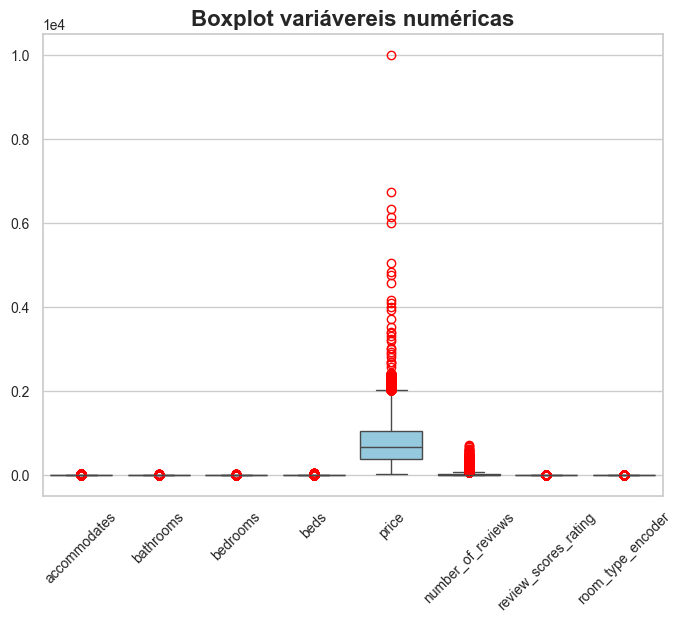

In [18]:
#Definindo o boxplot de variáveis numéricas 
sns.boxplot(data= num_cols, color = 'skyblue', 
            flierprops = dict(marker = 'o', markeredgecolor = 'red'))

#Título e eixos 
plt.title('Boxplot variávereis numéricas')
plt.xticks(rotation = 45)

**Análise**

- Podemos ver que a coluna 'price' e 'number_of_reviews' são as que mais possuem outliers, 
com isso vamos analisa-lás mais a fundo.


In [19]:
#Analisando estatísticas de Price
df['price'].describe()

count    32695.000000
mean       782.973788
std        522.337706
min         33.000000
25%        386.000000
50%        671.000000
75%       1036.000000
max      10000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Boxplot Price')

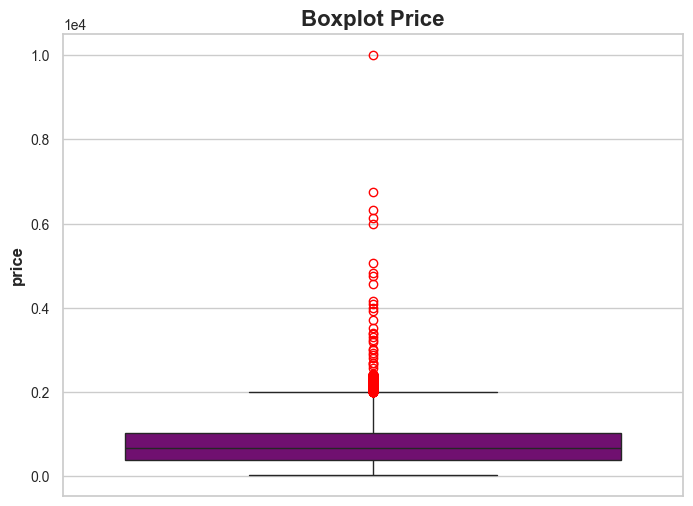

In [20]:

#Boxplot price 
sns.boxplot(data= df['price'], color = 'purple',
            flierprops = dict(marker = 'o', markeredgecolor = 'red'))

#Títulos e eixos 
plt.title('Boxplot Price')

In [21]:
#Removendo outliers com IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
IQR = q3-q1

#Definindo limites superiores e inferiores 
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

print('Limite superior:', upper_bound)
print('Limite inferior:', lower_bound)

Limite superior: 2011.0
Limite inferior: -589.0


In [22]:
#Mask para verificar outliers de price 
mask_outlier_price = (df['price'] < lower_bound) | (df['price'] > upper_bound)

print('Número de linhas com outliers em Price:',mask_outlier_price.sum())

Número de linhas com outliers em Price: 923


In [23]:
#Removendo ouliers 
df_filtred = df[~mask_outlier_price]

#Verificando as mudanças
print(f'Dimensão de Price no Dataframe original:',df['price'].shape[0])
print(f'Dimensão de Price no Dataframe sem outliers:',df_filtred['price'].shape[0])

Dimensão de Price no Dataframe original: 32695
Dimensão de Price no Dataframe sem outliers: 31772


## EDA

Imóveis com maiores avaliações

In [24]:
#Verificando estabelecimentos com os melhores avaliações
(
    df_filtred[['id','neighbourhood_cleansed', 'review_scores_rating']]
    .sort_values(by='review_scores_rating', ascending=False)
    .head(10)
)


,id,neighbourhood_cleansed,review_scores_rating
32557,1318312450737889039,Copacabana,5.0
29,286792,Copacabana,5.0
32480,1318067126762227308,Barra da Tijuca,5.0
32403,1316984394951652675,Copacabana,5.0
32373,1316837936927504913,Copacabana,5.0
32361,1316788080910275844,Centro,5.0
32331,1316292697979927354,Botafogo,5.0
32244,1315266917840070049,Glória,5.0
32225,1315243157185985299,Centro,5.0
32211,1314738340726083046,Copacabana,5.0


Text(0, 0.5, 'Bairro')

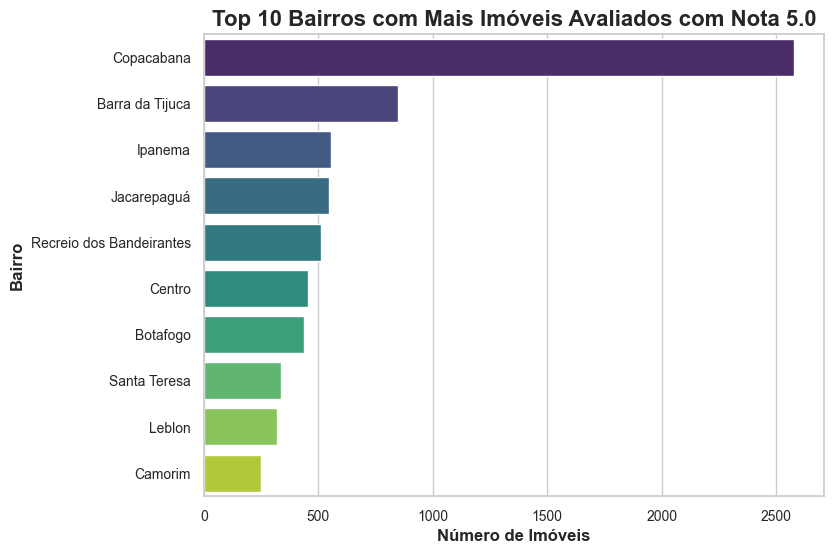

In [25]:
#Top estabelecimentos por bairro com nota 5.0
melhores_imoveis_por_bairro = df_filtred[df_filtred['review_scores_rating'] == 5.0]
contagem_por_bairro = melhores_imoveis_por_bairro['neighbourhood_cleansed'].value_counts().head(10)

#Gráfico
sns.barplot(x=contagem_por_bairro.values, y=contagem_por_bairro.index, palette='viridis')

#Título e eixos
plt.title('Top 10 Bairros com Mais Imóveis Avaliados com Nota 5.0')
plt.xlabel('Número de Imóveis')
plt.ylabel('Bairro')


Insights:

- Nesta tabela podemos ver que os estabelecimentos em bairros com melhores avaliações são Copacabana e Barra da Tijuca, podendo 
ser pelo fato de serem bairrros onde os imóveis são mais exclusivos/luxuosos e de classe mais alta.

- O alto número de avaliações positivas sugere que a qualidade geral das acomodações e a experiência do hóspede nesses bairros são consistentemente boas. 

Bairros com maior preço médio de ímoveis

In [ ]:
#Numero de anuncios por bairro
anuncios_por_bairro = df_filtred['neighbourhood_cleansed'].value_counts()

#Filtrando para manter apenas os bairros com um número mínimo de anúncios (> 100)
bairros_confiaveis = anuncios_por_bairro[anuncios_por_bairro > 100].index

#Filtrando com base na lista de bairros confiáveis
df_analise_bairros = df_filtred[df_filtred['neighbourhood_cleansed'].isin(bairros_confiaveis)]

#Top bairros com maiores preços
top_bairros = df_analise_bairros.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

Text(0, 0.5, 'Preço médio')

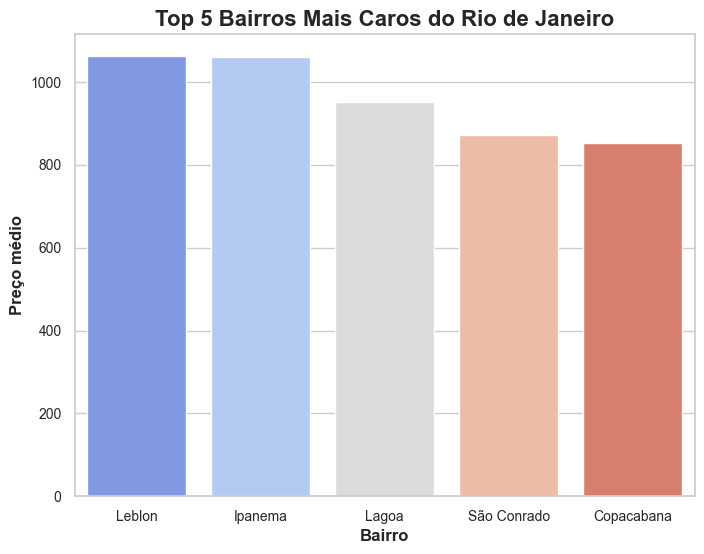

In [27]:
#Transformando a Series em um DataFrame
bairros_para_grafico = top_bairros.head(5).reset_index()

#Gráfico de barras
sns.barplot(x='neighbourhood_cleansed', y='price', data=bairros_para_grafico, palette='coolwarm')

#Título e eixos
plt.title('Top 5 Bairros Mais Caros do Rio de Janeiro')
plt.xlabel('Bairro')
plt.ylabel('Preço médio')


Insights:

- Neste gráfico podemos infeir que Lebon, Ipanema, Lagoa, São Conrado e Copacabana são os bairros mais 'caros', com aluguéis de 
estabelecimentos que são superiores a maioria, provavelmente para pessoas de classe alta e exigentes.

Maiores preços pelo tipo de quarto

Text(0, 0.5, 'Preço')

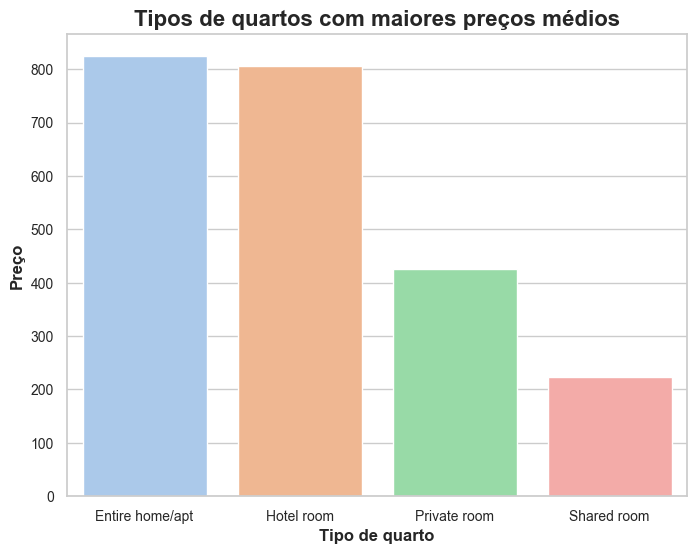

In [28]:
#Quartos com maiores preços médios
precos_por_quarto = df_filtred.groupby('room_type')['price'].mean().sort_values(ascending=False)

#Gráfico
sns.barplot(precos_por_quarto, palette='pastel')

#Título e eixos 
plt.title('Tipos de quartos com maiores preços médios')
plt.xlabel('Tipo de quarto')
plt.ylabel('Preço')

Insights: 

- Os tipos de quartos/casa mais caros são alugueis pela casa inteira, seguido por quartos de hotéis. 

- Quartos privativos e quartos compartilhados tendem a terem um valor bem mais abaixo de aluguél.

Preço médio pelo numéro de capacidade de hóspedes

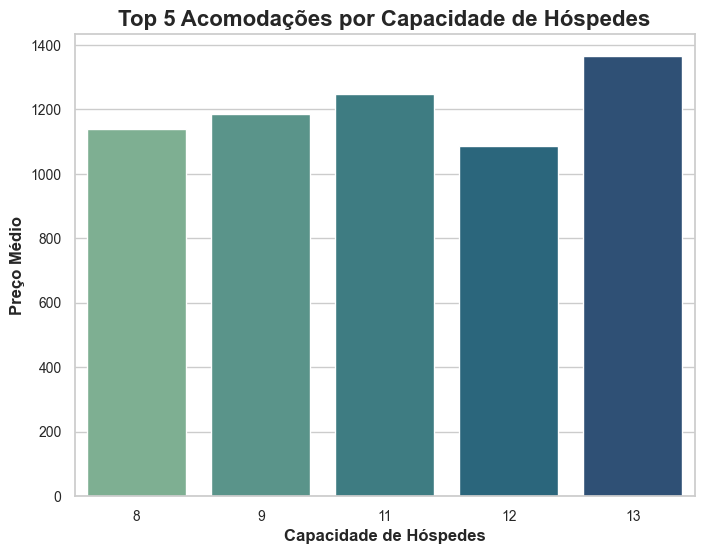

In [29]:
#Maiores preços por capacidade de hóspedes
top_acomodacoes = df_filtred.groupby('accommodates')['price'].mean().sort_values(ascending=False).head(5)

#Gráfico
sns.barplot(data=top_acomodacoes, palette='crest')

#Título e eixos
plt.title('Top 5 Acomodações por Capacidade de Hóspedes')
plt.xlabel('Capacidade de Hóspedes')
plt.ylabel('Preço Médio')
plt.show()

Insights: 

- Podemos ver nesse gráfico que quanto mais quartos possuír o imóvel, provavelmente mais caro é o seu preço, mesmo não sendo um fator predominante
para a definição de valor do mesmo.

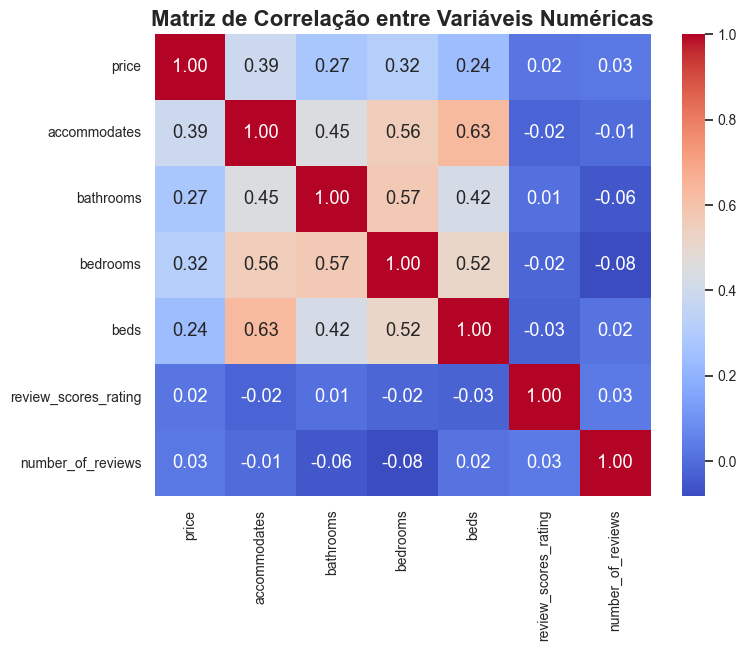

In [ ]:
#Matriz de correlação para ver a relação entre as colunas numéricas
numeric_cols = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']
correlation_matrix = df_filtred[numeric_cols].corr()

#Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

Insights:

- Na nossa variável principal Preço, não temos nenhuma variável em que possamos notar uma alta correlação, apenas 
correlações médias como a capacidade para hóspedes.

  

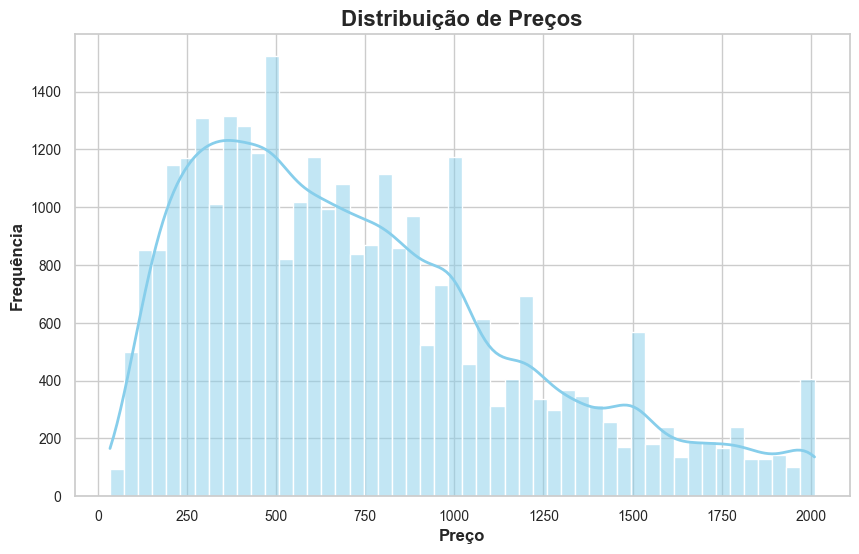

In [ ]:
#Histograma para a distribuição de preços (após a remoção de outliers)
plt.figure(figsize=(10, 6))
sns.histplot(df_filtred['price'], bins=50, kde=True, color='skyblue')

#Título e eixos
plt.title('Distribuição de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

Insights:

- Nesta análise, podemos ver que na nossa base a maioria dos estabelecimentos se concentram numa faixa de preço
  entre R$250,00 até R$1000,00 tendo o 'pico' com mais estabelecimentos em torno de R$500,00.

- O gráfico também mostra uma "cauda" longa, indicando que existem alguns estabelecimentos com preços muito altos (acima de R$ 1.000,00), mas eles são muito menos frequentes.

Salvando o novo dataset

In [34]:
#Salvando os novos dados 
df_filtred.to_csv('../Data/Processed/airbnb_analise_final.csv', index = False )